In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nn import (io, nn, preprocess)
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [2]:
# simulate dataset
digits = load_digits()
print(digits.data.shape)
X_all = digits.data
y_all = digits.target

(1797, 64)


In [3]:
# split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.33, random_state=42)
print(X_train.shape)
print(y_train.shape)

test_arch = [{'input_dim': 64, 'output_dim': 32, 'activation': 'relu'},
			 {'input_dim': 32, 'output_dim': 16, 'activation': 'relu'},
			 {'input_dim': 16, 'output_dim': 32, 'activation': 'relu'},
			 {'input_dim': 32, 'output_dim': 64, 'activation': 'relu'},
			 {'input_dim': 64, 'output_dim': 1, 'activation': 'sigmoid'}]

(1203, 64)
(1203,)


In [4]:
nn_auto = nn.NeuralNetwork(nn_arch = test_arch,
                           lr = 0.001, 
                           seed = 29, 
                           batch_size = 300, 
                           epochs = 75, 
                           loss_function = "mse")

In [5]:
# because the last layer of the network is a sigmoid function the outputs are between 0 and 1
# so I multiply the y arrays by 0.1 in order to match
(train_auto_loss, val_auto_loss) = nn_auto.fit(X_train.T, y_train * 0.1, X_test.T, y_test * 0.1)

EPOCH: 1
[0.49751696 0.4590619  0.51336199 0.43659571 0.50719971 0.53277554
 0.48641181 0.49414162 0.49438044 0.4935106 ]
[0.6 0.9 0.3 0.7 0.2 0.1 0.5 0.2 0.5 0.2]
EPOCH: 2
[0.48894294 0.45064268 0.50754598 0.42620226 0.49929191 0.52641978
 0.47562295 0.48599048 0.48478375 0.48572867]
[0.6 0.9 0.3 0.7 0.2 0.1 0.5 0.2 0.5 0.2]
EPOCH: 3
[0.48606599 0.44960089 0.50432862 0.42448176 0.49404175 0.52349861
 0.47238447 0.48339166 0.48059945 0.48226522]
[0.6 0.9 0.3 0.7 0.2 0.1 0.5 0.2 0.5 0.2]
EPOCH: 4
[0.48134539 0.44518238 0.50060611 0.41821115 0.49016709 0.5194078
 0.46635799 0.47826586 0.47521514 0.47759598]
[0.6 0.9 0.3 0.7 0.2 0.1 0.5 0.2 0.5 0.2]
EPOCH: 5
[0.47786171 0.44219991 0.49713814 0.41419365 0.48646468 0.51522619
 0.46192573 0.47419614 0.4715175  0.47314297]
[0.6 0.9 0.3 0.7 0.2 0.1 0.5 0.2 0.5 0.2]
EPOCH: 6
[0.47979386 0.44610782 0.49731903 0.41633126 0.48548736 0.51491391
 0.46372282 0.47471414 0.47257125 0.47286398]
[0.6 0.9 0.3 0.7 0.2 0.1 0.5 0.2 0.5 0.2]
EPOCH: 7
[0.47985

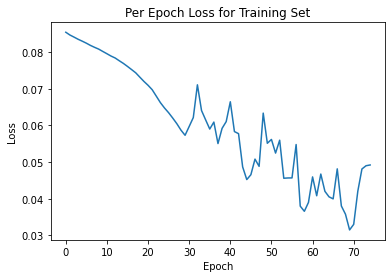

In [6]:
# plot losses
plt.figure()
plt.plot(train_auto_loss)
plt.title("Per Epoch Loss for Training Set")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

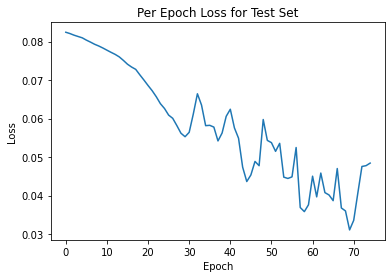

In [7]:
plt.figure()
plt.plot(val_auto_loss)
plt.title("Per Epoch Loss for Test Set")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [8]:
# Evaluate
model_prob = nn_auto.predict(X_test.T)
model_pred = np.floor(model_prob * 10)
print(model_prob[0:10])
print(model_pred[0:10])
print(y_test[0:10])
print('CONFUSION MATRIX')
print(confusion_matrix(y_test, model_pred))
print('CLASSFICATION REPORT')
print(classification_report(y_test, model_pred))

[0.70654835 0.72931196 0.54122393 0.61300585 0.40788379 0.58084798
 0.62111483 0.3594396  0.54052492 0.28876434]
[7. 7. 5. 6. 4. 5. 6. 3. 5. 2.]
[6 9 3 7 2 1 5 2 5 2]
CONFUSION MATRIX
[[ 1 16 16  8  7  6  1  0  0  0]
 [ 0  0  1 19 12 12 11  0  0  0]
 [ 0  0  9 30 10  2  1  0  0  0]
 [ 0  0  0  3 16 25 12  0  0  0]
 [ 0  0  5  2  4 11 36  6  0  0]
 [ 0  0  1  1  1 11 54  5  0  0]
 [ 0  0  0  0  1  2 46  8  0  0]
 [ 0  0  0  0  0  4 24 34  0  0]
 [ 0  0  0  0  2  2 22 26  0  0]
 [ 0  0  0  0  0  5 33 30  0  0]]
CLASSFICATION REPORT
              precision    recall  f1-score   support

           0       1.00      0.02      0.04        55
           1       0.00      0.00      0.00        55
           2       0.28      0.17      0.21        52
           3       0.05      0.05      0.05        56
           4       0.08      0.06      0.07        64
           5       0.14      0.15      0.14        73
           6       0.19      0.81      0.31        57
           7       0.31      0.

/Library/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [9]:
# Reconstruction Error
(y_hat,cache) = nn_auto.forward(X_test.T)
# the reconstructed images are stored in Ag -- the output of the second-to-last layer
reconstruction = cache['A4']
print("RECONSTRUCTION ERROR (MSE)")
reconstruction_error = nn_auto._mean_squared_error(X_test.T, reconstruction)
print(reconstruction_error)
print("PREDICTION ERROR (MSE)")
prediction_error = nn_auto._mean_squared_error(y_test, model_pred)
print(prediction_error)
print("On average, the predicted digit is within " + str(round(np.sqrt(prediction_error), 2)) + " of the actual digit")

RECONSTRUCTION ERROR (MSE)
58.78159156115434
PREDICTION ERROR (MSE)
4.148148148148148
On average, the predicted digit is within 2.04 of the actual digit
